In [30]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [31]:
img = cv2.imread('image.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

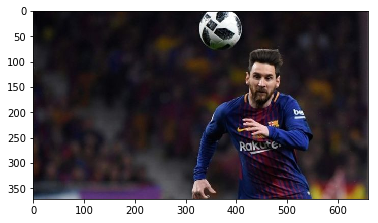

In [32]:
plt.imshow(img)
plt.show()

In [41]:
def MSRCR(img, sigma_list, G, b, alpha, beta):
    
    img = np.float64(img)+1.0  #To prevent from log 0
    
    #Multiscale Retinex
    img_ret = np.zeros_like(img)
    for sigma in sigma_list:
        img_ret += np.log10(img)-np.log10(cv2.GaussianBlur(img,(0,0),sigma))
    
    img_ret = img_ret/len(sigma_list)
    
    #Color Restoration is done using the formula 
    img_sum = np.sum(img, axis=2, keepdims=True)
    color_restoration = beta * (np.log10(alpha * img) - np.log10(img_sum))
    
    #MSRCR
    img_msrcr = G * (img_ret * color_restoration + b)
    
    #Normalize
    for i in range(img_msrcr.shape[2]):
        img_msrcr[:, :, i] = (img_msrcr[:, :, i] - np.min(img_msrcr[:, :, i])) / (np.max(img_msrcr[:, :, i]) - np.min(img_msrcr[:, :, i])) * 255
    
    img_msrcr = np.uint8(np.minimum(np.maximum(img_msrcr, 0), 255))
    
    return img_msrcr

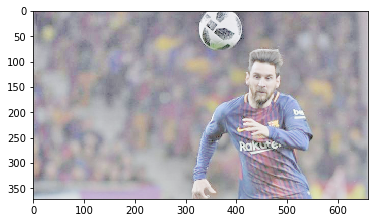

In [39]:
img_msrcr2 = MSRCR2(img,[15,80,250],192,-30,125,46)

plt.imshow(img_msrcr2)
plt.show()

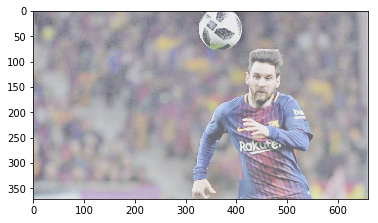

In [42]:
img_msrcr2 = MSRCR2(img,[15,80,250],192,-30,125,46,0.01,0.99)

plt.imshow(img_msrcr2)
plt.show()